<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [12]:
#step1: import libraries
#step2: load data
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Boxplot for MEDV')

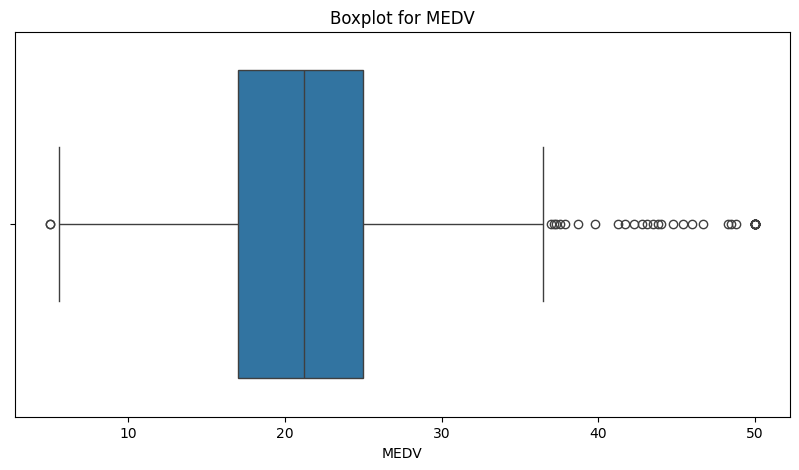

In [15]:
#step3: boxplot for "median value of owner occupied homes"
plt.figure(figsize=(10,5))
sns.boxplot(x=df.MEDV)
plt.title("Boxplot for MEDV")

#MEDV has many outliers after the third quartle and max value of 37. 
#It is worth studying the characteristics of outliers compared to the average. 

Text(0.5, 1.0, 'Histogram for Charles River')

<Figure size 1000x500 with 0 Axes>

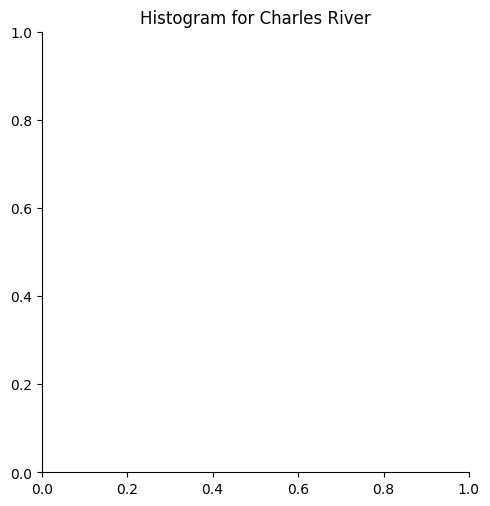

In [16]:
#step4: barplot for charles river
plt.figure(figsize=(10,5))
sns.displot(a=df.CHAS, bins=10, kde=False)
plt.title("Histogram for Charles River")

# Majority of houses do not track the Charles River. 

Text(0.5, 1.0, 'Boxplot for the MEDV vs AGE variable')

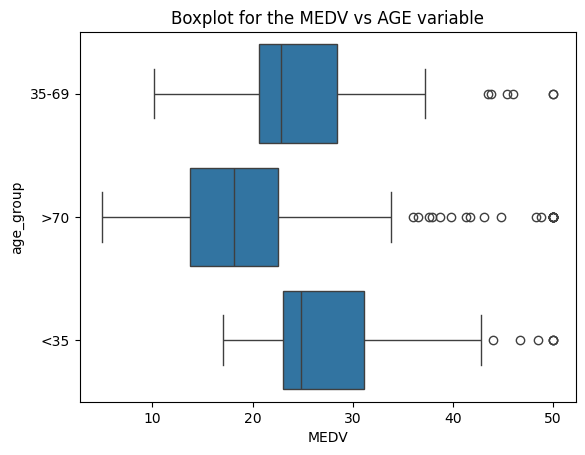

In [18]:

#step5: boxplot for MEDV variable vs AGE variable (discretize age to <35, 35-69, >70)
df.loc[df['AGE']<35,'age_group']='<35'
df.loc[(df['AGE']>=35) & (df['AGE']<=69),'age_group']='35-69'
df.loc[df['AGE']>70,'age_group']='>70'
df.head()
sns.boxplot(x='MEDV', y='age_group', data=df)
plt.title("Boxplot for the MEDV vs AGE variable")

#35 years and younger own houses in the more expensive range 
#whilst those 70 years and older tend to own the houses in cheaper range. 
#outliers which are almost exclusively expensive houses are owned by those that are 70 years and older.
#age group between 35 and 70 tend to own averagely priced houses 

Text(0.5, 1.0, 'Relatioship between NOX and INDUS')

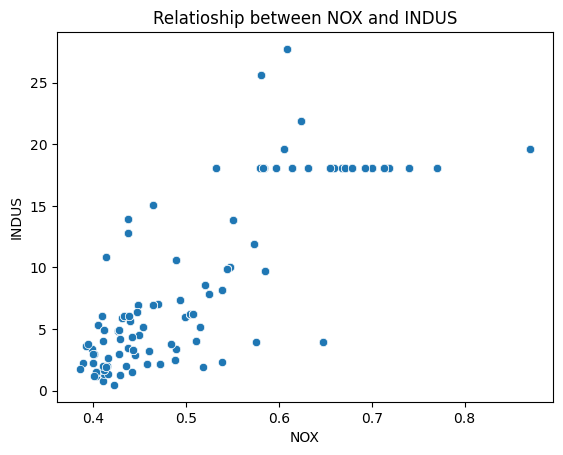

In [19]:
#step6: scatterplot for NO conc and INDUS
ax= sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title("Relatioship between NOX and INDUS")

#The higher the NOX, the less INDUS. There seems to be a linear relationship until NOX = 0.6

<ipython-input-20-7b714fa4bded>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.PTRATIO, bins=10, kde=False)


Text(0.5, 1.0, 'Histogram for the Pupil to Teacher Ratio variable')

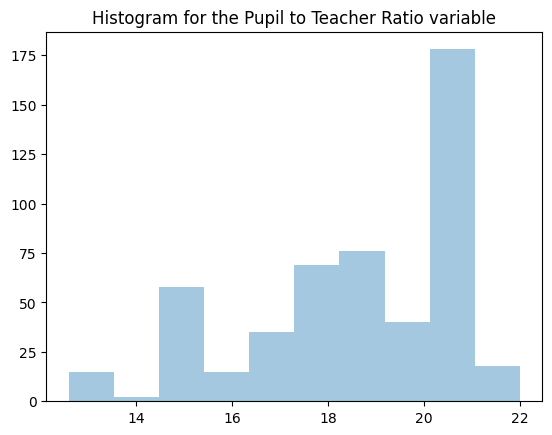

In [20]:
#step7: historgram for pupil to teacher ratio variable
sns.distplot(x=df.PTRATIO, bins=10, kde=False)
plt.title("Histogram for the Pupil to Teacher Ratio variable")

#Pupil to teacher ratio is highest at 20-21 range. 


In [22]:
#t test to determine if there is significant difference between MEDV and CHAS
a=df[df["CHAS"]==0]["MEDV"]
b=df[df["CHAS"]==1]["MEDV"]
scipy.stats.ttest_ind(a,b, axis=0, equal_var=True)

#H0: There is no significant difference in MEDV by CHARLS
#H1: MEDV of CHAS = 0 is different from MEDV of CHAS = 1
#C: Since p_value<0.05, we reject the null hypothesis and accept H1. 

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [23]:
#anova to determine difference in MEDV for each proportion of AGE
a=df[df["age_group"]=="<35"]["MEDV"]
b=df[df["age_group"]=="35-69"]["MEDV"]
c=df[df["age_group"]==">70"]["MEDV"]
f_stats, p_value=scipy.stats.f_oneway(a,b,c, axis=0)
print(f_stats, p_value)

#H0: There is no difference in MEDV across AGE groups.
#H1: There is a difference in at least one of the AGE groups.
#C: Since p_value<0.05, we accept H1. 

36.55881642700528 1.5257926968093306e-15


In [24]:
#pearson correlation to determine relationship between NOX and INDUS
scipy.stats.pearsonr(df["NOX"], df["INDUS"])

#H0: There is no correlation between NOX and INDUS. 
#H1: NOX is correlated with INDUS
#C: Since p_value<0.05, we reject H0 and accept H1. There is correlation between NOX and INDUS


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [25]:
#regression to determine impact of DIS to MEDV
y=df["MEDV"]
x=df["DIS"]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

#H0: DIS is not related to MEDV
#H1: DIS is related to MEDV
#C: Based from the correlation of coefficient (R), which is 0.25, there is weak correlation between DIS and MEDV.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        22:40:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""